<a href="https://colab.research.google.com/github/Lokeshwar26/Regional-Sales-analysis/blob/main/Regional_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **problem statement**

XYZ Co's 2014-2018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/Regional Sales Dataset.xlsx",sheet_name=None)
df

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [ ]:
df_sales=df['Sales Orders']
df_customers=df['Customers']
df_products=df['Products']
df_regions=df['Regions']
df_states=df['State Regions']
df_budgets=df['2017 Budgets']

In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
print("df_sales shape",(df_sales.shape) )
print("df_customers shape",(df_customers.shape) )
print("df_products shape",(df_products.shape) )
print("df_regions shape",(df_regions.shape) )
print("df_states shape",(df_states.shape) )
print("df_budgets shape",(df_budgets.shape) )

df_sales shape (64104, 12)
df_customers shape (175, 2)
df_products shape (30, 2)
df_regions shape (994, 15)
df_states shape (49, 3)
df_budgets shape (30, 2)


In [ ]:
new_header=df_states.iloc[0]
df_states.columns=new_header
df_states=df_states[1:].reset_index(drop=True)
df_states.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_states.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_states.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
##with customers
df_merge=df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)
df_merge.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
##with products
df_merge=df_merge.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)
df_merge.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [ ]:
##with Regions
df_merge=df_merge.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)
df_merge.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
##with State
df_merge=df_merge.merge(
    df_states[["State Code",'Region']],
    how='left',
    left_on='state_code',
    right_on='State Code'
)
df_merge.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
##with Budgets
df_merge=df_merge.merge(
    df_budgets,
    how='left',
    on='Product Name'
)
df_merge.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [ ]:
df_merge.to_csv("file.csv")

In [ ]:
cols_to_drop=['Customer Index','Index','id','State Code','state code_y', 'region_y','state code_x']
df_merge.drop(columns=cols_to_drop,inplace=True,errors='ignore')
df_merge.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
df_merge.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
df_merge.columns=df_merge.columns.str.lower()
df_merge.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
cols_to_keep=[
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'

]

In [ ]:
df_merge=df_merge[cols_to_keep]
df_merge.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
df_merge=df_merge.rename(columns={
    'ordernumber':'order_num',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'total_unit_cost',
    'state_code':'state',
    'county':'county',
    'state':'state_name',
    'region':'region',
    'latitude':'lat',
    'longitude':'long',
    '2017 budgets':'budget'
    })
df_merge.head(5)

,order_num,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,long,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
df_merge.loc[df_merge['order_date'].dt.year !=2017,'budget']=pd.NA
df_merge[['order_date','product_name','revenue','budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_num        64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total_unit_cost  64104 non-null  float64       
 9   state            64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  lat              64104 non-null  float64       
 14  long             64104 non-null  float

In [ ]:
df_2017=df_merge[df_merge['order_date'].dt.year==2017]
df_2017.head(5)

,order_num,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,long,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


In [ ]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15263 entries, 46363 to 61625
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_num        15263 non-null  object        
 1   order_date       15263 non-null  datetime64[ns]
 2   customer_name    15263 non-null  object        
 3   channel          15263 non-null  object        
 4   product_name     15263 non-null  object        
 5   order_quantity   15263 non-null  int64         
 6   unit_price       15263 non-null  float64       
 7   revenue          15263 non-null  float64       
 8   total_unit_cost  15263 non-null  float64       
 9   state            15263 non-null  object        
 10  county           15263 non-null  object        
 11  state_name       15263 non-null  object        
 12  region           15263 non-null  object        
 13  lat              15263 non-null  float64       
 14  long             15263 non-null  float6

In [ ]:
df_merge['total_cost']=df_merge['order_quantity']*df_merge['total_unit_cost']


In [ ]:
df_merge['profit']=df_merge['revenue']-df_merge['total_cost']
df_merge['profit_margin_percentage']=df_merge['profit']/df_merge['revenue']*100

In [ ]:
df_merge.head(5)

,order_num,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state,county,state_name,region,lat,long,budget,total_cost,profit,profit_margin_percentage
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


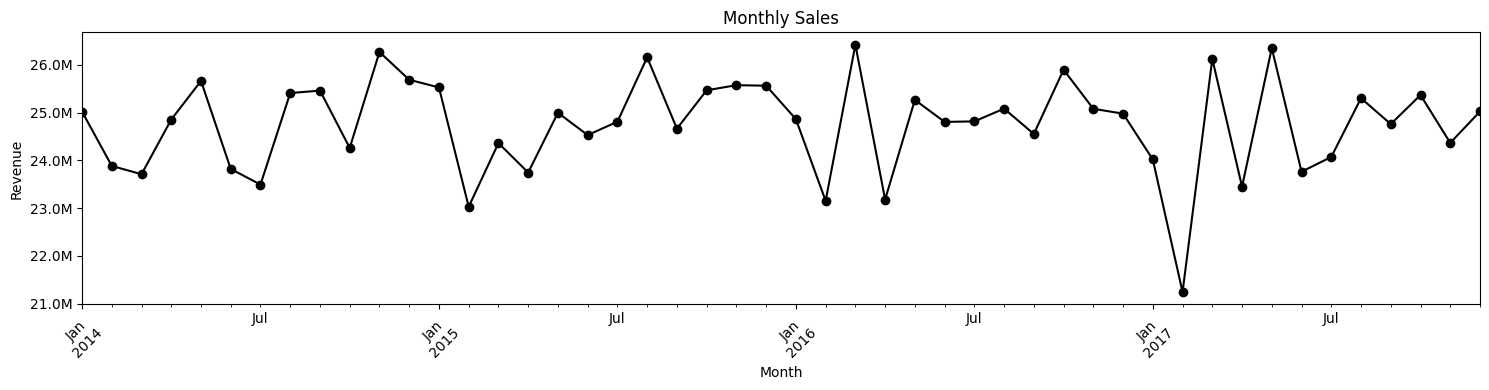

In [ ]:
df_merge['order_month']=df_merge['order_date'].dt.to_period('M')
monthly_sales=df_merge.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o',color='black')
from matplotlib.ticker import FuncFormatter
formatter=FuncFormatter(lambda x,pos:f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

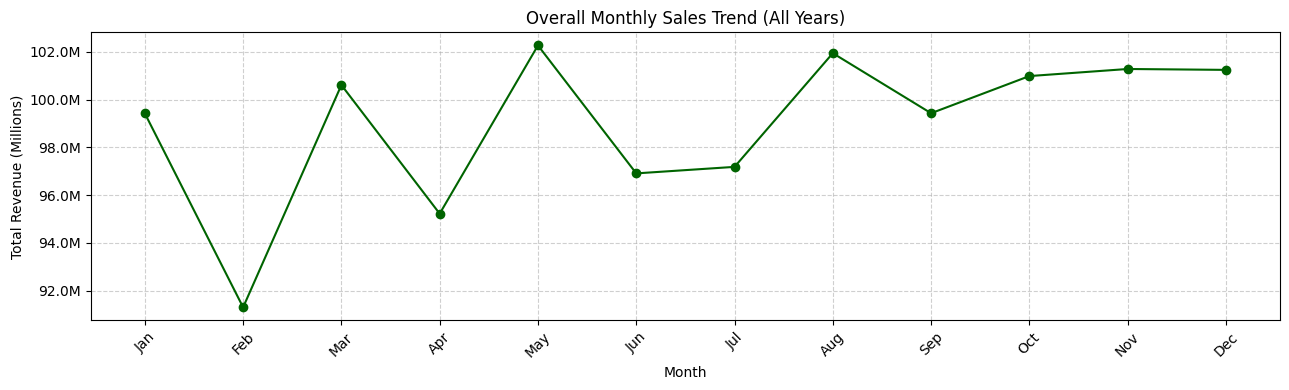

In [ ]:


# Step 1: Make sure 'order_date' is in datetime format
df_merge['order_date'] = pd.to_datetime(df_merge['order_date'], errors='coerce')

# Step 2: Create month columns if not already created
df_merge['order_month_num'] = df_merge['order_date'].dt.month
df_merge['order_month_name'] = df_merge['order_date'].dt.strftime('%b')  # 'Jan', 'Feb', etc.

# Step 3: Group and aggregate for all years (no filtering)
monthly_sales = (
    df_merge
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# Step 4: Plot
plt.figure(figsize=(13, 4))
months_ordered = [calendar.month_abbr[num] for num in monthly_sales.index.get_level_values(0)]

plt.plot(
    months_ordered,
    monthly_sales.values,
    marker='o',
    color='darkgreen'
)

# Step 5: Format Y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Step 6: Add labels
plt.title('Overall Monthly Sales Trend (All Years)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


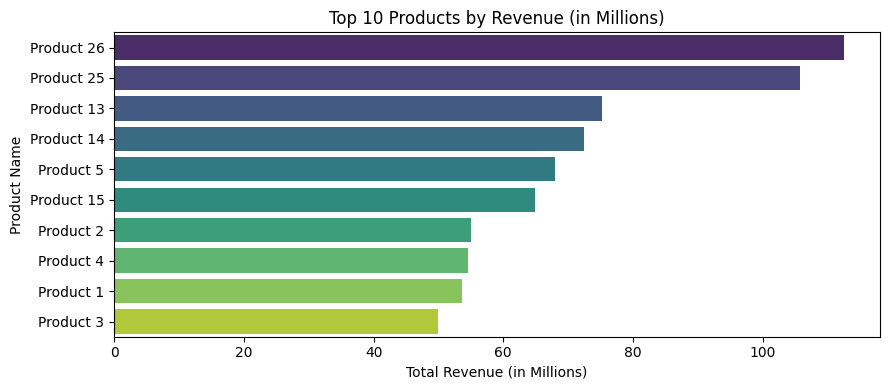

In [ ]:
# Calculate total revenue for each product and convert values to millions
top_prod = df_merge.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

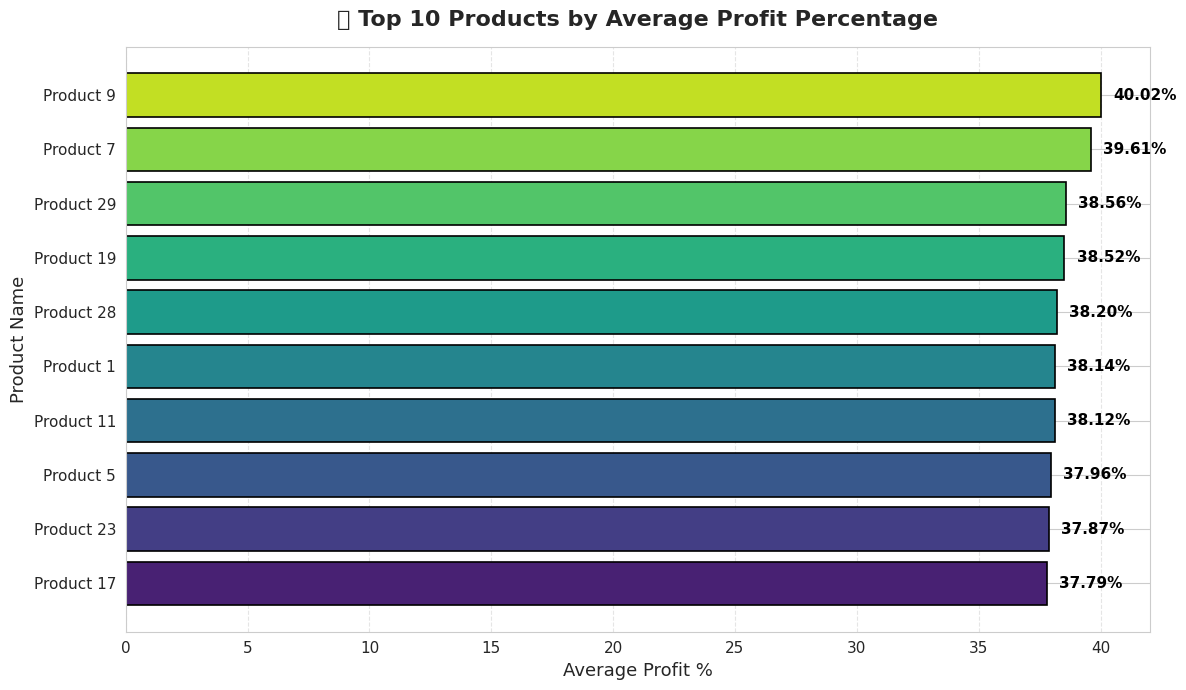

In [ ]:

# Optional: Apply a nicer style
sns.set_style("whitegrid")

# Step 1: Remove zero-revenue rows to avoid divide-by-zero
df_merge = df_merge[df_merge['revenue'] != 0]

# Step 2: Calculate profit percentage
df_merge['profit_percent'] = (df_merge['profit'] / df_merge['revenue']) * 100

# Step 3: Group by product and get average profit %
top_products = (
    df_merge
    .groupby('product_name')['profit_percent']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Step 4: Create a color gradient (optional)
colors = sns.color_palette("viridis", len(top_products))

# Step 5: Plot
plt.figure(figsize=(12, 7))
bars = plt.barh(top_products.index[::-1], top_products.values[::-1], color=colors, edgecolor='black', linewidth=1.2)

# Title and axis labels
plt.title('🌟 Top 10 Products by Average Profit Percentage', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Average Profit %', fontsize=13)
plt.ylabel('Product Name', fontsize=13)

# Add percentage labels to bars
for bar in bars:
    plt.text(bar.get_width() + 0.5,           # slightly to the right of the bar
             bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%',
             va='center',
             fontsize=11,
             color='black',
             fontweight='bold')

# Tweak layout
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


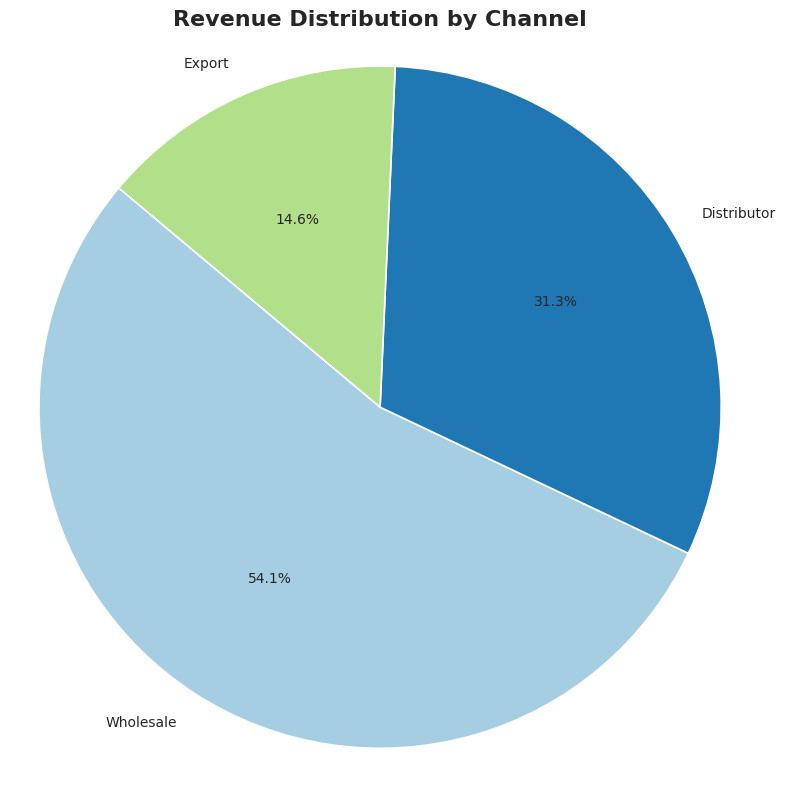

In [ ]:
# Step 1: Group by 'channel' and sum the revenue
channel_revenue = df_merge.groupby('channel')['revenue'].sum()

# Step 2: Sort for cleaner display (optional)
channel_revenue = channel_revenue.sort_values(ascending=False)

# Step 3: Plot
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(channel_revenue)))  # custom color palette

# Step 4: Create pie chart
plt.pie(
    channel_revenue,
    labels=channel_revenue.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2}
)

plt.title('Revenue Distribution by Channel', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()


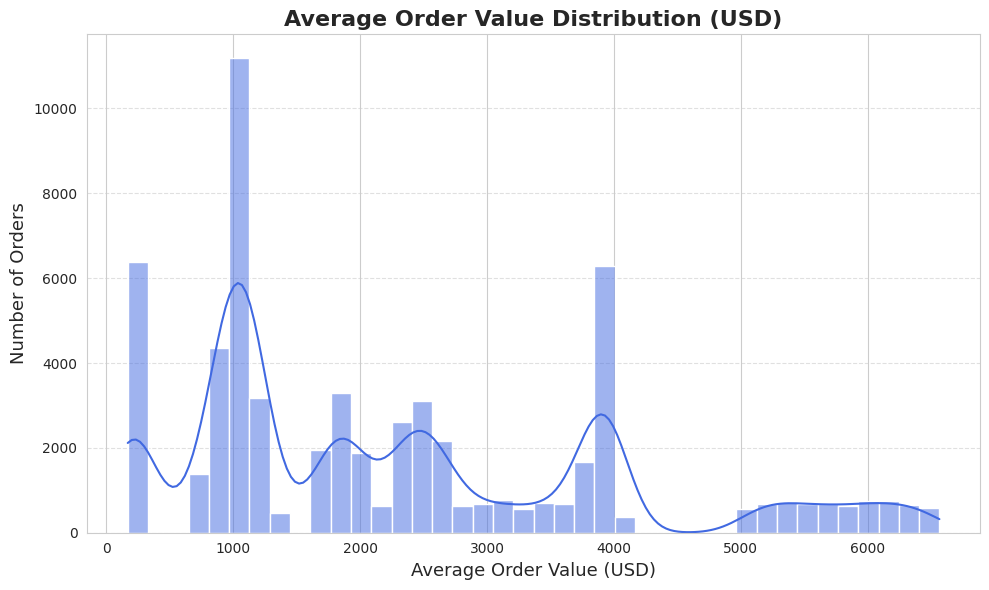

In [ ]:
# Step 1: Filter out zero quantity to avoid division by zero
df_valid = df_merge[df_merge['order_quantity'] > 0]

# Step 2: Calculate Average Order Value in USD
df_valid['aov_usd'] = df_valid['revenue'] / df_valid['order_quantity']

# Step 3: Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_valid['aov_usd'], bins=40, kde=True, color='royalblue')

plt.title('Average Order Value Distribution (USD)', fontsize=16, fontweight='bold')
plt.xlabel('Average Order Value (USD)', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


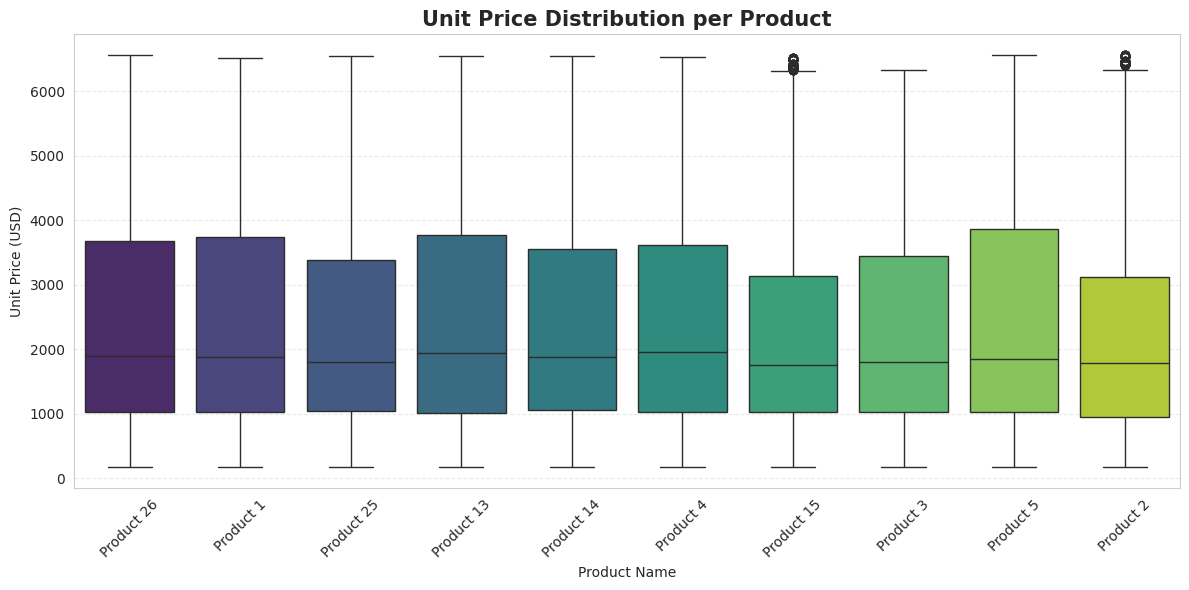

In [ ]:
# Step 1: Filter out any zero or negative unit prices (optional safety)
df_valid = df_merge[df_merge['unit_price'] > 0]

# Step 2: (Optional) Focus on top N products by frequency for readability
top_products = df_valid['product_name'].value_counts().head(10).index
df_top = df_valid[df_valid['product_name'].isin(top_products)]

# Step 3: Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='product_name', y='unit_price', palette='viridis')

plt.title('Unit Price Distribution per Product', fontsize=15, fontweight='bold')
plt.xlabel('Product Name')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


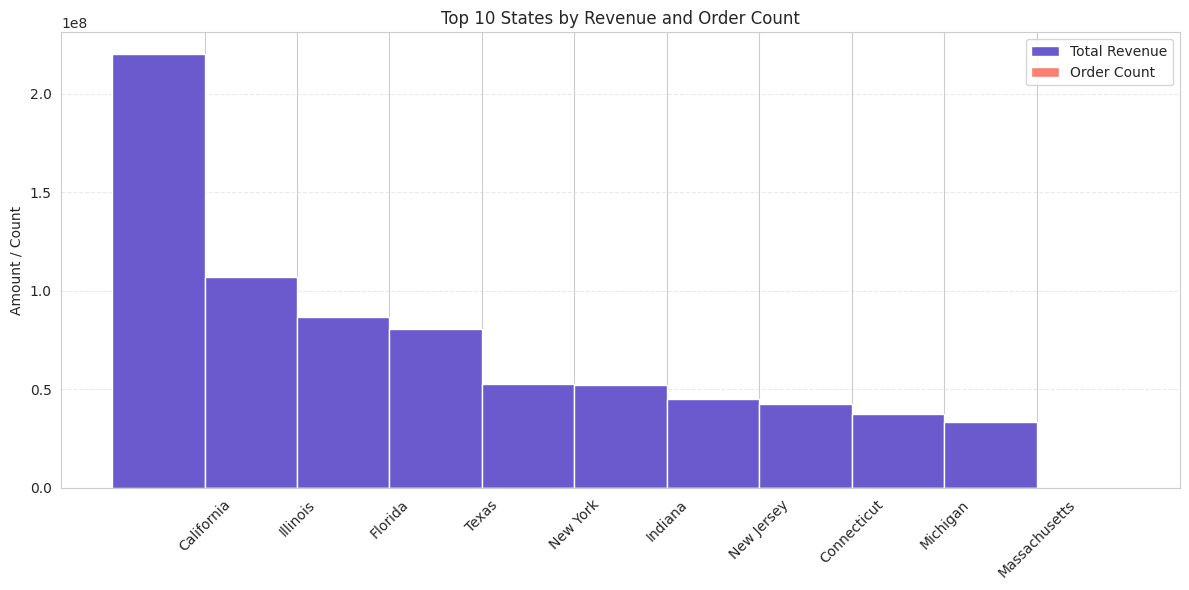

In [ ]:
# Step 1: Group by state and compute total revenue and order count
state_summary = (
    df_merge
    .groupby('state_name')
    .agg(total_revenue=('revenue', 'sum'), order_count=('order_num', 'count'))
    .sort_values(by='total_revenue', ascending=False)
    .head(10)
)

# Step 2: Plot side-by-side bars
plt.figure(figsize=(12, 6))
bar_width = 1
states = state_summary.index
x = range(len(states))

# Revenue bars
plt.bar(x, state_summary['total_revenue'], width=bar_width, label='Total Revenue', color='slateblue')

# Order count bars (shifted right)
plt.bar([p + bar_width for p in x], state_summary['order_count'], width=bar_width, label='Order Count', color='salmon')

# X-axis labels and formatting
plt.xticks([p + bar_width / 2 for p in x], states, rotation=45)
plt.ylabel('Amount / Count')
plt.title('Top 10 States by Revenue and Order Count')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


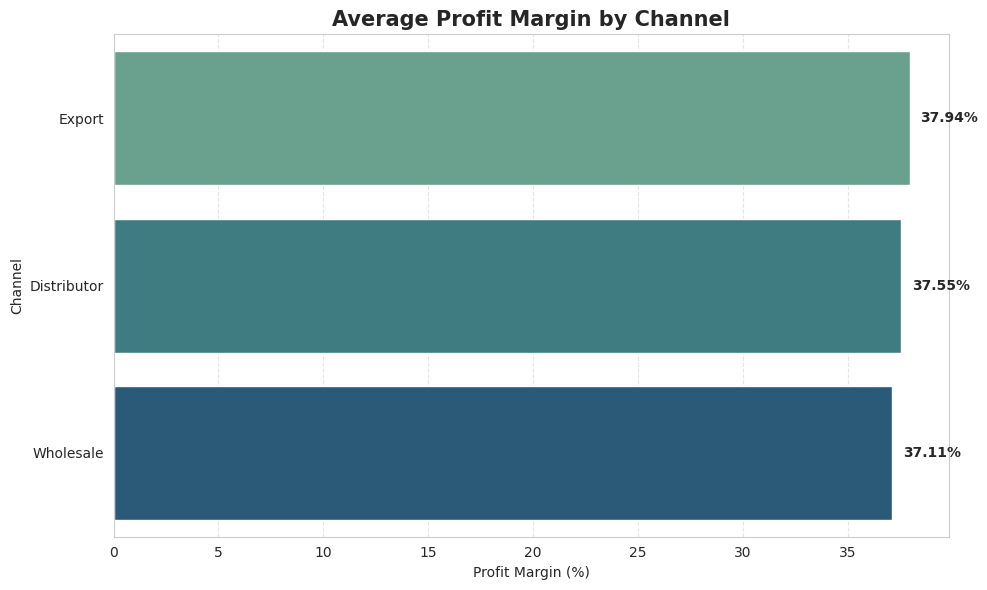

In [ ]:
# Step 1: Filter out missing or zero revenue (optional safety)
df_valid = df_merge[df_merge['revenue'] > 0]

# Step 2: Group by channel and compute average profit margin
channel_margin = (
    df_valid
    .groupby('channel')['profit_margin_percentage']
    .mean()
    .sort_values(ascending=False)
)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_margin.values, y=channel_margin.index, palette='crest')

# Add value labels
for i, val in enumerate(channel_margin.values):
    plt.text(val + 0.5, i, f'{val:.2f}%', va='center', fontsize=10, fontweight='bold')

# Styling
plt.title('Average Profit Margin by Channel', fontsize=15, fontweight='bold')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Channel')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


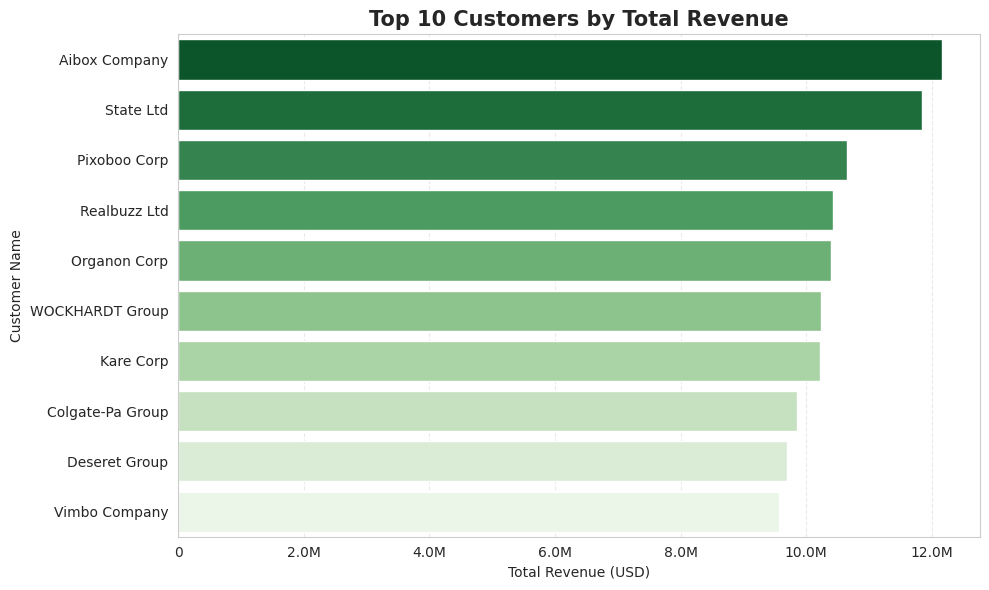

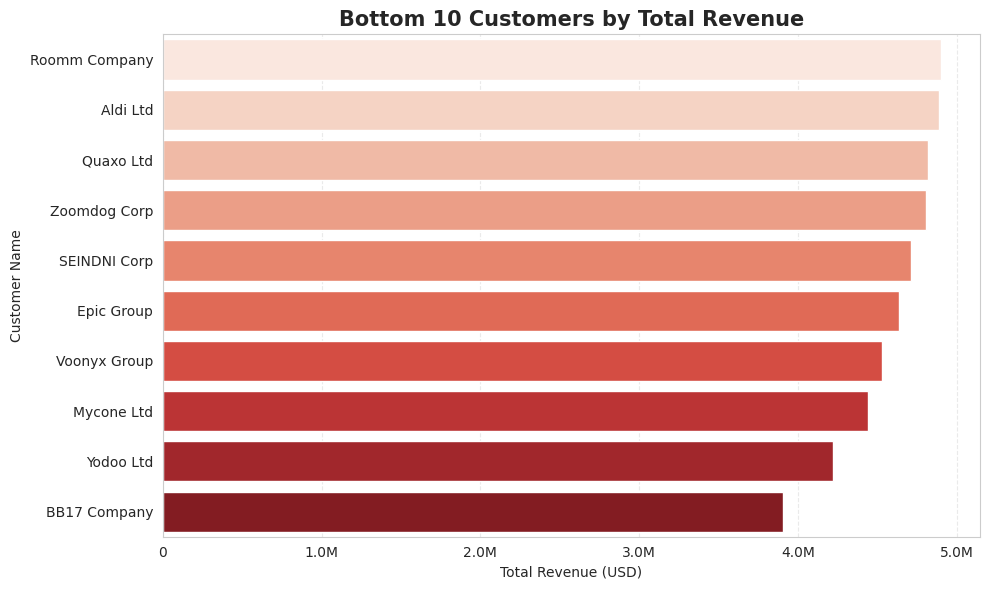

In [ ]:

# Step 1: Group by customer and calculate total revenue
customer_revenue = (
    df_merge
    .groupby('customer_name')['revenue']
    .sum()
    .sort_values(ascending=False)
)

# Step 2: Remove customers with 0 or negative revenue
customer_revenue = customer_revenue[customer_revenue > 0]

# Step 3: Separate top and bottom 10
top_10 = customer_revenue.head(10)
bottom_10 = customer_revenue.tail(10)

# Formatter function to display in thousands (K) or millions (M)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'
    else:
        return f'{x:.0f}'

formatter = FuncFormatter(currency_formatter)

# ---------------------------------------
# PLOT 1: Top 10 Customers by Revenue
# ---------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='Greens_r')
plt.title('Top 10 Customers by Total Revenue', fontsize=15, fontweight='bold')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Customer Name')
plt.gca().xaxis.set_major_formatter(formatter)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ---------------------------------------
# PLOT 2: Bottom 10 Customers by Revenue
# ---------------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10.values, y=bottom_10.index, palette='Reds')
plt.title('Bottom 10 Customers by Total Revenue', fontsize=15, fontweight='bold')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Customer Name')
plt.gca().xaxis.set_major_formatter(formatter)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


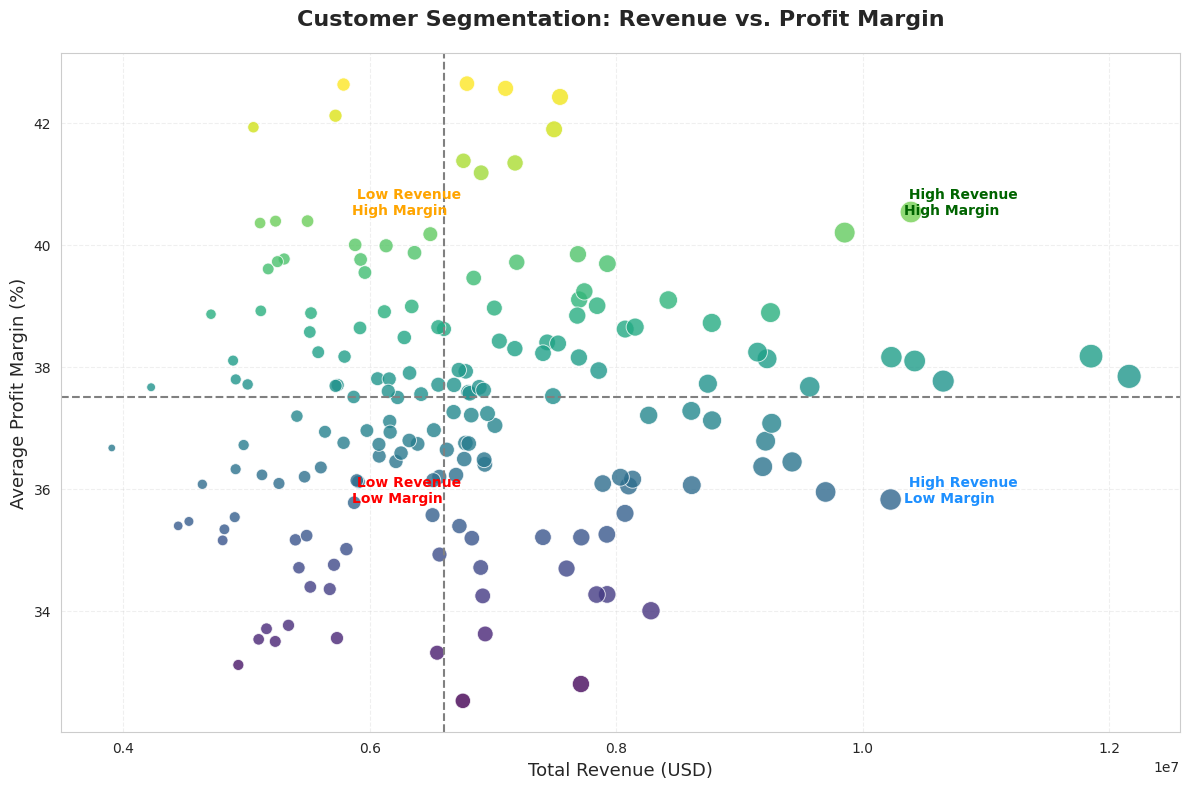

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean the data (exclude missing or invalid entries)
df_valid = df_merge[
    (df_merge['revenue'] > 0) &
    (df_merge['profit_margin_percentage'].notnull())
]

# Step 2: Aggregate data by customer
customer_segmentation = (
    df_valid
    .groupby('customer_name')
    .agg(
        total_revenue=('revenue', 'sum'),
        avg_profit_margin=('profit_margin_percentage', 'mean')
    )
    .reset_index()
)

# Step 3: Plotting
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=customer_segmentation,
    x='total_revenue',
    y='avg_profit_margin',
    hue='avg_profit_margin',
    size='total_revenue',
    sizes=(30, 300),
    palette='viridis',
    alpha=0.8,
    legend=False
)

# Step 4: Add titles and labels
plt.title('Customer Segmentation: Revenue vs. Profit Margin', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Revenue (USD)', fontsize=13)
plt.ylabel('Average Profit Margin (%)', fontsize=13)

# Step 5: Add median lines for segmentation
plt.axvline(customer_segmentation['total_revenue'].median(), color='gray', linestyle='--', label='Median Revenue')
plt.axhline(customer_segmentation['avg_profit_margin'].median(), color='gray', linestyle='--', label='Median Profit Margin')

# Step 6: Add annotation for key segments
plt.text(customer_segmentation['total_revenue'].max()*0.85, customer_segmentation['avg_profit_margin'].max()*0.95,
         ' High Revenue\nHigh Margin', fontsize=10, weight='bold', color='darkgreen')
plt.text(customer_segmentation['total_revenue'].min()*1.5, customer_segmentation['avg_profit_margin'].max()*0.95,
         ' Low Revenue\nHigh Margin', fontsize=10, weight='bold', color='orange')
plt.text(customer_segmentation['total_revenue'].max()*0.85, customer_segmentation['avg_profit_margin'].min()*1.1,
         ' High Revenue\nLow Margin', fontsize=10, weight='bold', color='dodgerblue')
plt.text(customer_segmentation['total_revenue'].min()*1.5, customer_segmentation['avg_profit_margin'].min()*1.1,
         ' Low Revenue\nLow Margin', fontsize=10, weight='bold', color='red')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


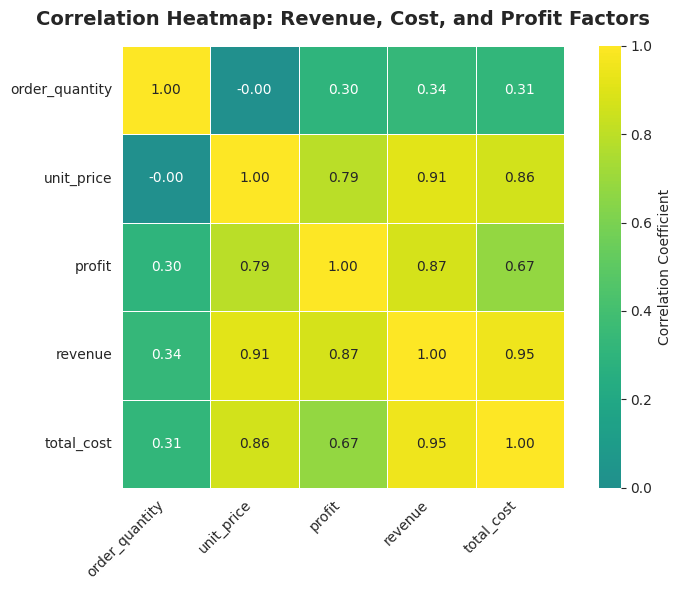

In [ ]:

# Step 1: Select only important features
features = ['order_quantity', 'unit_price', 'profit', 'revenue', 'total_cost']
df_selected = df_merge[features]

# Step 2: Compute correlation matrix
corr_matrix = df_selected.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,                 # Display correlation values
    fmt=".2f",                  # Format to 2 decimal places
    cmap='viridis',
    center=0,                   # Center the scale at 0
    linewidths=0.5,             # Line between cells
    square=True,                # Keep square aspect ratio
    cbar_kws={'label': 'Correlation Coefficient'}  # Label for color bar
)

# Step 4: Labels and layout
plt.title('Correlation Heatmap: Revenue, Cost, and Profit Factors', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
df_merge.to_csv('Sales_data(EDA Exported).csv', index=False)

In [ ]:
from google.colab import files
files.download('Sales_data(EDA Exported).csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>